# Fun Math

# An Interesting Property of 13

If you reverse its digits and then find square, or if you reverse the digits of its square, the results are the same: 
\begin{align*}
13^2 &= 169, \\
31^2 &= 961. 
\end{align*}
Other examples of number with this property are 12 and below: 

In [9]:
n = 20111001

int(str(n**2)[::-1]) == int(str(n)[::-1])**2

True

## A Somewhat Counterintuitive Result

Let $X_t$ be the solution of $dX_t = X_t dW_t$ with $X_0 = 1$. Then 
\begin{align*}
X_t = e^{-\frac{t}{2} + W_t} \rightarrow 0 \qquad\text{ as }t\rightarrow \infty, 
\end{align*}
but $X_t$ is a martingale so $E[X_t] = X_0 = 1$ for all $t>0$. 


Although this might seen counterintuitive at first glance, if one think about a large but finite value of $t$, this is less so. 

## Closed Form Expression of the Fibonacci Numbers


令 $\lambda_1, \lambda_2$ 為二次方程式 $a x^2 + b x + c = 0$ 的兩根，則
\begin{align*}
a \lambda_1^2 + b \lambda_1 + c = 0.
\end{align*}
等號兩邊同乘 $\lambda_1^n$ 可以得到 
\begin{align*}
a \lambda_1^{n+2} + b \lambda_1^{n+1} + c \lambda_1^n = 0.
\end{align*}
同樣的，對 $\lambda_2$ 也可以得到
\begin{align*}
a \lambda_2^{n+2} + b \lambda_2^{n+1} + c \lambda_2^n = 0.
\end{align*}
現在把上面兩個式子作線性組合：
\begin{align*}
0 &= c_1(a \lambda_1^{n+2} + b \lambda_1^{n+1} + c \lambda_1^n) + c_2(a \lambda_2^{n+2} + b \lambda_2^{n+1} + c \lambda_2^n)\\
&= a \left(c_1\lambda_1^{n+2}+c_2\lambda_2^{n+2}\right) + b \left(c_1\lambda_1^{n+1}+c_2\lambda_2^{n+1}\right) + c \left(c_1\lambda_1^{n}+c_2\lambda_2^{n}\right).
\end{align*}
於是可以得到以下結論：數列 $F_n = c_1\lambda_1^{n}+c_2\lambda_2^{n}$ 滿足遞迴式
\begin{align*}
\begin{cases}
a F_{n+2} + b F_{n+1} + c F_{n} = 0\\
F_0 = c_1 + c_2\\
F_1 = c_1\lambda_1 + c_2\lambda_2
\end{cases}
\end{align*}
其中 $\lambda_1, \lambda_2$ 為 $a x^2 + b x + c = 0$ 的兩根。$a x^2 + b x + c = 0$ 就是這個遞迴式的特徵方程。
現在代入費式數列的遞迴定義 $a=1, b=c=-1$ 可以求得
\begin{align*}
\lambda_j = \frac{1\pm \sqrt{5}}{2}, \qquad j=1, 2, 
\end{align*}
再把 $\lambda_1, \lambda_2$ 代入
\begin{align*}
\begin{cases}
F_0 = c_1 + c_2 = 0\\
F_1 = c_1\lambda_1 + c_2\lambda_2 = 1
\end{cases}
\end{align*}
可以求得 $c_1 = 1/\sqrt{5}, c_2 = -1/\sqrt{5}$，所以
\begin{align*}
F_n = \frac{1}{\sqrt{5}}\left(\left(\frac{1+\sqrt{5}}{2}\right)^n - \left(\frac{1-\sqrt{5}}{2}\right)^n\right). 
\end{align*}

## The Solution Formula to the Riccati Equation 

Assuming $pq\neq 0$ and $p\neq q$, the Riccati equation 
\begin{align*}
\begin{cases}
y'(t) = a(y(t) - p)(y(t) - q)\\
y(0) = 0
\end{cases}
\end{align*}
has a closed form "solution"
\begin{align*}
y(t) = pq\left(\frac{1-e^{-a(p-q)t}}{p-qe^{-a(p-q)t}}\right)
\end{align*}
that people use all the time, although it does not always hold. 
Define 
\begin{align*}
t^* = -\frac{1}{a}\left(\frac{\log p-\log q}{p-q}\right). 
\end{align*}
If $t^*$ is real positive, the closed form formula is only the solution to the Riccati equation for $t\in[0, t^*)$. This is because when $t$ approaches $t^*$, the denominator in the closed form formula goes to 0, making the solution infinity. 
Here is a numerical example: When $a=-1, p=2, q=1$, below is a plot of the closed form formula: 

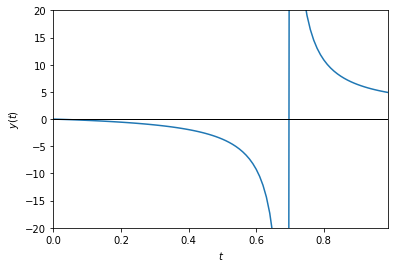

In [23]:
import numpy as np
from pandas import DataFrame

a = -1
p = 2
q = 1

t = np.arange(0, 1, 0.01)
y = p*q*((1-np.exp(-a*(p-q)*t))/(p-q*np.exp(-a*(p-q)*t)))

ax = DataFrame({'t': t, 'y': y}).set_index('t').plot(legend=None)
ax.set(ylim=(-20, 20), xlim=(0, 0.99), xlabel='$t$', ylabel='$y(t)$')
ax.axhline(0, color='k', lw=1)
pass

In this example we have $t^* = \log 2 \approx 0.693147$. One can see from the plot that only before this critical time the closed form formula is the solution to the initial value problem. 

If $t^*$ is complex or if it is real negative then the closed form formula gives the solution for all $t\ge 0$. When $p$ and $q$ are both real, the critical value $t^*$ is real positive if and only if $a$ is real negative, which is not the case in the CIR interest rate model. That is why the CIR model never runs into this issue. The Heston model with complex $p$ and $q$, however, is not so lucky. 

## Newton's Method for Square Root Has Quadratic Convergence

For square root a simple completing the square will do the trick:
\begin{align*}
\frac{x + \frac{a}{x}}{2} - \sqrt{a} &= \frac12\left(x -2\sqrt{a} + \frac{a}{x}\right)\\
&= \frac12\left(\sqrt{x} - \sqrt{\frac{a}{x}}\right)^2\\
&= \frac{1}{2x}\left(x - \sqrt{a}\right)^2, 
\end{align*}
which says the error in the next iteration is the error in this iteration squared divided by $2x$.


A more general proof for general functions can be found on [wikipedia.](https://en.wikipedia.org/wiki/Newton%27s_method#Proof_of_quadratic_convergence_for_Newton's_iterative_method)

## Checking if an Integer Is a Perfect Square

The goal here is to prove that Newton's method with integer division (integer division) can be used to determine if an integer is a perfect square. 

This method is discussed (without proof) in a [stackoverflow post](https://stackoverflow.com/questions/2489435/check-if-a-number-is-a-perfect-square), which gives the following procedure. It works for any large integer, for example 123456789**100 which is too large to convert to float for implementations relying on ```math.sqrt```. 

In [11]:
%%time

def is_square(a):
    x = a//2
    seen = set([x])
    while x*x != a:
        x = (x + a//x)//2
        if x in seen:
            return False
        seen.add(x)
    return True

print(is_square(123456789**100))

True
CPU times: user 12 ms, sys: 8 ms, total: 20 ms
Wall time: 16.5 ms


Assume that $x\in\mathbb N, \sqrt{a}\in\mathbb N$ and $x>\sqrt{a}$. With integer division, the error after one iteration is really 
\begin{align*}
\frac{x+\frac{a - r_1}{x} - r_2}{2} - \sqrt{a} &= \frac{x+\frac{a}{x}}{2} - \sqrt{a} -\left( \frac{r_1}{2x} + \frac{r_2}{2}\right)\\
&= \frac{1}{2x}\left(x - \sqrt{a}\right)^2 - \left( \frac{r_1}{2x} + \frac{r_2}{2}\right), 
\end{align*}
where $r_1$ and $r_2$ are the remainders from the division. Since they must satisfy $r_1 < x$, $r_2\leq 1$, we have $r_1/(2x) + r_2/2 < 1/2 + 1/2 = 1$.
Now note that this error is an integer, so we can write
\begin{align*}
\frac{x+\frac{a - r_1}{x} - r_2}{2} - \sqrt{a} &= \left \lfloor\frac{1}{2x}\left(x - \sqrt{a}\right)^2 \right \rfloor. 
\end{align*}

## Simulation

This is to confirm the following is correct: 
\begin{align*}
\text{cov}\left(\int_0^T t\,dW_t, \int_0^T W_t \,dt\right) = \frac{T^3}{6}, 
\end{align*}
which is 1.3333 if $T=2$ like in the below simulation. 


Recall that $E(W(t)W(s)) = s\land t$. Roughly speaking, 
\begin{align*}
E\left(\int_0^T t\,dW_t\int_0^T W_t dt\right) &= E\left(\int_0^T\int_0^T s W_t \,dW_sdt\right)\\
&\approx E\left(\sum_i\sum_j s_j W(t_i) (W(s_{j+1}) - W(s_j)) \Delta t\right)\\
&\approx \sum_i\sum_j s_j \left[E(W(t_i)W(s_{j+1})) - E(W(t_i)W(s_j))\right] \Delta t \\
&\approx \sum_i\sum_j s_j \left[ \Delta s1_{\{t_i>s_j\}} \right] \Delta t \\
&\approx \iint\limits_{t>s} s \,ds dt = \frac{T^3}{6}.
\end{align*}

In [2]:
%%time
import numpy as np
from scipy.stats import norm
from pandas import Series

n = 10000
T = 2

sample_size = 10000
sample = []
for i in range(sample_size):
    w = Series(norm.rvs(loc=0, scale=np.sqrt(T/n), size=n).cumsum()).shift(1, fill_value=0)
    w.index = w.index*T/n
    t = w.index
    sample.append((w.diff().dropna().values @ t[1:].values, w.sum()*T/n))

print(np.cov(np.array(sample).T))

[[2.65784801 1.33743398]
 [1.33743398 2.68333453]]
CPU times: user 23.2 s, sys: 41.1 ms, total: 23.2 s
Wall time: 24 s


## Inverse Mills Ratio 

We have the conditional expectation
\begin{eqnarray*}
E[X|X>K] &=& \frac{f_X(K)}{1-F_X(K)}, \\
E[X|X<K] &=& -\frac{f_X(K)}{F_X(K)}, 
\end{eqnarray*}
where the last one is what's known as the [inverse Mills ratio](https://en.wikipedia.org/wiki/Mills_ratio#Inverse_Mills_ratio) taking negative. Below is a simulation using the standard normal distribution. 

In [95]:
from numpy.random import normal
from scipy.stats import norm
n = 1000000
K = 1.5

a = norm.rvs(loc=0, scale=1, size=n)

print(a[a < K].mean())
print(-norm.pdf(K)/(norm.cdf(K)))

-0.13895207849237406
-0.13878975045885078


## Calculate the 41st Root in 1 Second

Python integer can be arbitrarily large. Below is $54^{41}$. 

In [4]:
54**41

106695020879414327538426959056889063841348427743537143096812648481685504

Generate a random integer between $[0, 100)$ and compute its 41st power. 

In [3]:
import random

a = random.randrange(100)
a**41

3574546132030870770399332670577487090810665965922351838949846024192

The answer is 

In [2]:
a

44

## $3^4$ vs. $4^3$ which one is bigger? 

（和[常見的微分作法](https://www.youtube.com/watch?v=L0XY6llSzyo)不同）

\begin{eqnarray*}
\frac{d}{da} a^b &=& a^b\left(\frac{b}{a}\right)\\
\frac{d}{db} a^b &=& a^b\ln a
\end{eqnarray*}
so 
\begin{eqnarray*}
(a+h)^b &\approx& a^b + h(a^b\left(\frac{b}{a}\right))\\
a^{b+h} &\approx& a^b + h(a^b\ln a)
\end{eqnarray*}

從 $3^3$ 開始，要把 1 加在底數還是指數會讓值變得更大？（相當於 $a=b=3, h=1$）看上面的式子可以猜到加在指數更好，也就是 $3^4$ 較大。


泰展多寫幾項也可以比出 $e^{\pi} > \pi^e$。和微分作法一樣可以推出更一般的結論：當指數和底數都大於 $e$ 時，指數比較大者數值就比較大。但像 $2.5^3$ 和 $3^{2.5}$ 這種兩個數分別在 $e$ 的左右時微分作法比不出來，這裡的泰展作法比較好比。不過泰展本來就是在計算數值，有點作弊。


## Square Root of a Complex Number

If $x\ge 0$, $y\ge 0$ then 
\begin{align*}
\sqrt{x+yi} = \sqrt{\frac{\sqrt{x^2+y^2}+x}{2}} + i \sqrt{\frac{\sqrt{x^2+y^2}-x}{2}}. 
\end{align*}
This can be used to find the numerical values like $\sqrt{2+17i} = 3.0917 + 2.74929i$. 

## $\cos(1^\circ)$ in Closed Form

用三倍角公式和 $\cos(60^\circ)=1/2$ 加上卡當諾公式可以算出 $\cos(20^\circ)$ 的 closed form。再利用 $\sin(18^\circ)=(-1+\sqrt 5)/4$ 跟和角公式可以算出 $\cos(2^\circ) = \cos(20^\circ - 18^\circ)$。最後用半角公式，可以算出

\begin{align*}
\cos(1^\circ) = \sqrt{\frac{1}{2} \left(1+\frac{1}{4} \sqrt{\frac{1}{2} \left(5+\sqrt{5}\right)}
   \left(\sqrt[3]{\frac{1}{2} \left(1-i \sqrt{3}\right)}+\sqrt[3]{\frac{1}{2} \left(1+i
   \sqrt{3}\right)}\right)+\frac{1}{4} \left(\sqrt{5}-1\right) \sqrt{1-\frac{1}{4}
   \left(\sqrt[3]{\frac{1}{2} \left(1-i \sqrt{3}\right)}+\sqrt[3]{\frac{1}{2} \left(1+i
   \sqrt{3}\right)}\right)^2}\right)} 
\end{align*}

但是有 $i$ 在三次根號裡開不出來，所以有這個公式還是沒辦法用古典的方法把數值算出來。$\cos(1^\circ)$ 的數值大約是 0.999848。

為了計算 $\cos(1^\circ)$ 的數值，與其設計複數直式開立方來計算上面這個公式的值，還不如設計直式解三次方式程求 $\cos(20^\circ)$。有沒有辦法直接直式計算 $\cos(x^\circ)$？


把 $\cos(30^\circ)=\sqrt{3}/2$ 拿來套半角公式算出 $\cos(15^\circ)$，再用 $\cos(18^\circ)$ 的值和合角公式就可以算出
\begin{align*}
\cos(3^\circ) = \frac{1}{8} \left(\sqrt{2-\sqrt{3}} \left(\sqrt{5}-1\right)+\sqrt{2 \left(2+\sqrt{3}\right) \left(5+\sqrt{5}\right)}\right)
\end{align*}
這個是真正的 closed form，沒有任何複數，可以直接用這個公式算出數值。有了這個值，再用卡當諾公式解 $4x^3-3x = \cos(3^\circ)$ 就得到
\begin{align*}
\cos(1^\circ) &= \frac{1}{4} \left(\sqrt[3]{\sqrt{2-\sqrt{3}} \left(\sqrt{5}-1\right)+\sqrt{2 \left(2+\sqrt{3}\right) \left(5+\sqrt{5}\right)}-2 \sqrt{-8+\sqrt{3}+\sqrt{15}-\sqrt{\frac{1}{2}
   \left(5+\sqrt{5}\right)}+\sqrt{\frac{1}{2} \left(25+5 \sqrt{5}\right)}}}\right.\\
   &+\left.\sqrt[3]{\sqrt{2-\sqrt{3}} \left(\sqrt{5}-1\right)+\sqrt{2 \left(2+\sqrt{3}\right)
   \left(5+\sqrt{5}\right)}+2 \sqrt{-8+\sqrt{3}+\sqrt{15}-\sqrt{\frac{1}{2} \left(5+\sqrt{5}\right)}+\sqrt{\frac{1}{2} \left(25+5 \sqrt{5}\right)}}}\right)
\end{align*}
這個公式乍看之下沒有複數但實際上是作弊的因為根號裡面有負數。結果就是這個公式的數值還是沒辦法用直式開方法算出來。
